In [7]:
# Assistant
import pandas as pd
import matplotlib.pyplot as plt

# Load data with encoding parameter
df = pd.read_csv(r"C:\Users\nitya\Downloads\archive/Superstore.csv", encoding='latin1')

# First, check the actual column names in the dataframe
print("Column names in the dataframe:", df.columns.tolist())

# The 'Date' column might have a different name or capitalization
# Let's assume the date column is named 'Order Date' based on common superstore datasets
# Modify this line according to the actual column name from the output above
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort values using the correct column name
df = df.sort_values('Order Date')

# Check missing values
df = df.dropna()

print(df.head())

Column names in the dataframe: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03   1/7/2014  Standard Class   
739      740  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
740      741  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
741      742  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
1759    1760  CA-2014-141817 2014-01-05  1/12/2014  Standard Class   

     Customer ID  Customer Name      Segment        Country          City  \
7980    DP-13000  Darren Powers     Consumer  United States       Houston   
739     PO-19195  Phillina Ober  Home Office  United States    Naperville   
740     PO-19195  Phillina Ober  Home Office  United Stat

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\nitya\Downloads\archive/Superstore.csv", encoding='latin1')

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Sort by date
df = df.sort_values('Order Date')

print(df[['Order Date', 'Sales']].head())


     Order Date    Sales
7980 2014-01-03   16.448
739  2014-01-04   11.784
740  2014-01-04  272.736
741  2014-01-04    3.540
1759 2014-01-05   19.536


In [10]:
# Monthly sales aggregation
monthly_sales = (
    df
    .groupby(pd.Grouper(key='Order Date', freq='M'))
    .agg({'Sales':'sum'})
    .reset_index()
)

monthly_sales.columns = ['Date', 'Sales']
print(monthly_sales.head())


        Date      Sales
0 2014-01-31  14236.895
1 2014-02-28   4519.892
2 2014-03-31  55691.009
3 2014-04-30  28295.345
4 2014-05-31  23648.287


C:\Users\nitya\AppData\Local\Temp\ipykernel_27908\3929442168.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))


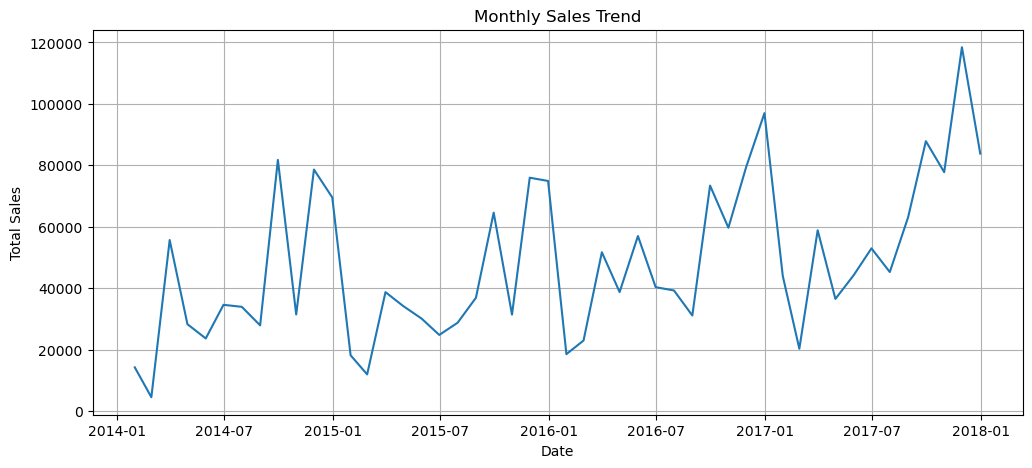

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [12]:
from prophet import Prophet

# Prepare Prophet format
prophet_df = monthly_sales.rename(
    columns={'Date':'ds', 'Sales':'y'}
)

# Build advanced model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10
)

model.fit(prophet_df)

# Future forecast (12 months)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


17:07:21 - cmdstanpy - INFO - Chain [1] start processing
17:07:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\nitya\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


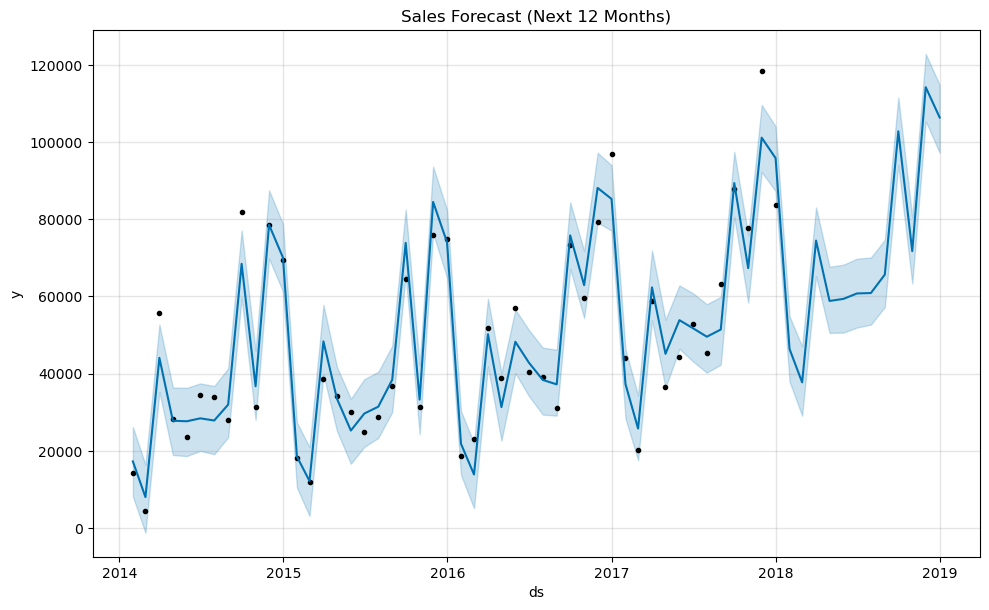

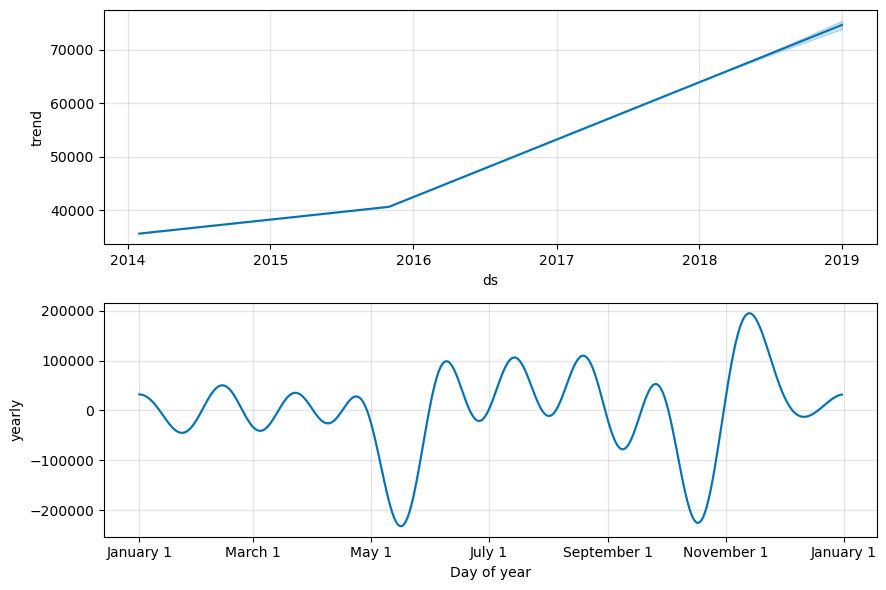

In [13]:
# Forecast plot
model.plot(forecast)
plt.title("Sales Forecast (Next 12 Months)")
plt.show()

# Trend & seasonality
model.plot_components(forecast)
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_percentage_error

merged = prophet_df.merge(
    forecast[['ds','yhat']], on='ds', how='inner'
)

mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
print(f"MAPE: {mape*100:.2f}%")


MAPE: 13.69%


In [17]:
forecast_export = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_export.columns = [
    'Date', 'Forecast Sales', 'Lower Bound', 'Upper Bound'
]

forecast_export.to_csv(r"C:\Users\nitya\Downloads\archive/sales_forecast.csv", index=False)
